# Block 2: Grid-Search



In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load dataset
df = pd.read_json('../data/cars.json')
df

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA
...,...,...,...,...,...,...,...,...,...
401,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,1982-01-01,USA
402,vw pickup,44.0,4,97.0,52.0,2130,24.6,1982-01-01,Europe
403,dodge rampage,32.0,4,135.0,84.0,2295,11.6,1982-01-01,USA
404,ford ranger,28.0,4,120.0,79.0,2625,18.6,1982-01-01,USA


In [20]:
# build our inputs and outputs
X = df['Horsepower'].to_numpy() # N
y = df['Miles_per_Gallon'].to_numpy() # N
ix_excluded = np.isnan(X) | np.isnan(y)

# exclude examples with no horsepower or mpg
X = X[~ix_excluded]
y = y[~ix_excluded]

## Grid-Search: The Wrong Way

In [35]:
# now, let's try different values of b0 and b1
# we'll do it with a loop, then we will do it the right way

# set of b0s
b0s = np.linspace(-50, 50, 100)

# set of b1s
b1s = np.linspace(-2, 2, 100)

best_p = None 
min_loss = np.inf 
for b0 in b0s:
    for b1 in b1s:
        yhat = b0 + b1 * X 
        loss = np.mean(np.square(yhat - y))
        if loss < min_loss:
            min_loss = loss 
            best_p = (b0, b1)
best_p

(np.float64(37.87878787878789), np.float64(-0.14141414141414121))

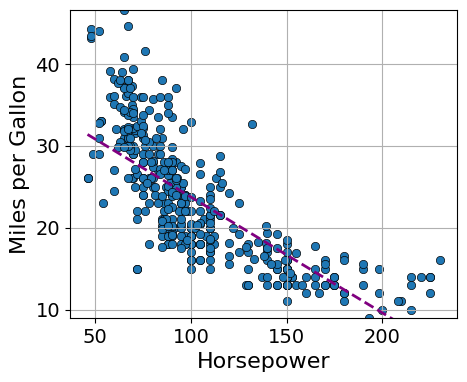

In [36]:
def plot_data(df, best_p):
    # lets plot
    fig, ax = plt.subplots(1, 1, figsize=(5, 4), sharey=True)
    sns.scatterplot(ax=ax, 
                    data=df, 
                    y='Miles_per_Gallon', 
                    x='Horsepower',
                    edgecolor='black')
    ax.xaxis.set_tick_params(labelsize=14)  
    ax.yaxis.set_tick_params(labelsize=14)  
    ax.set_ylabel('Miles per Gallon', fontsize=16)
    ax.set_xlabel('Horsepower', fontsize=16)

    # plot the line

    # get params
    b0, b1 = best_p

    # prepare the points at which the model will be evaluated
    max_hp = np.max(df['Horsepower'])
    min_hp = np.min(df['Horsepower'])
    xs = np.linspace(min_hp, max_hp, 100)

    # run the model
    yhat = b0 + b1 * xs

    # plot line
    ax.plot(xs, yhat, linestyle='--', linewidth=2, color='purple')

    # set limits
    ax.set_ylim([np.min(df['Miles_per_Gallon']), np.max(df['Miles_per_Gallon'])])
    ax.grid(True, 'both')

plot_data(df, best_p)

## Grid-Search: The Right Way

In [37]:
b0s = np.linspace(-50, 50, 100) # R0
b1s = np.linspace(-2, 2, 100) # R1
B0, B1 = np.meshgrid(b0s, b1s) # Returns two matrices of size R0 x R1
B0 # the b0 values of each combination
B1 # the b1 values of each combination

array([[-2.        , -2.        , -2.        , ..., -2.        ,
        -2.        , -2.        ],
       [-1.95959596, -1.95959596, -1.95959596, ..., -1.95959596,
        -1.95959596, -1.95959596],
       [-1.91919192, -1.91919192, -1.91919192, ..., -1.91919192,
        -1.91919192, -1.91919192],
       ...,
       [ 1.91919192,  1.91919192,  1.91919192, ...,  1.91919192,
         1.91919192,  1.91919192],
       [ 1.95959596,  1.95959596,  1.95959596, ...,  1.95959596,
         1.95959596,  1.95959596],
       [ 2.        ,  2.        ,  2.        , ...,  2.        ,
         2.        ,  2.        ]], shape=(100, 100))

In [38]:
# This will evluate all combinations all at once, taking advantage of modern compute hardware
# compare the running times to prove to youself!

# broadcasting in action! No loops necessary!
# Tracing the shape: R0xR1 + R0xR1x1 * 1x1xN = R0xR1xN
Yhat = B0[:,:,None] + B1[:,:, None] * X[None,None, :] # this is why tracing the shape is important!
mse = np.mean(np.square(Yhat - y[None,None, :]), axis=2) # R0xR1

# now we want to figure out the best parameters
ix = mse.argmin()

# unfortunately, this prints the flattened index
print(ix)

# translate into 2D index
ix_min_b1, ix_min_b0 = np.unravel_index(ix, mse.shape)

# get the parameter values
min_b0 = b0s[ix_min_b0]
min_b1 = b1s[ix_min_b1]

print(min_b0, min_b1)

4687
37.87878787878789 -0.14141414141414121
